**Author:** Sterling Hayden

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data_Files/Flights_Wrangled_Old.csv')

C:\Users\rvenka23\AppData\Local\Temp\2\ipykernel_29332\2657979606.py:1: DtypeWarning: Columns (78,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data_Files/Flights_Wrangled_Old.csv')


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Year,Quarter,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Operating_Airline.,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum
0,2022,2,1,5,2022-04-01,WN,19393,WN,19393,WN,N903WN,649,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,820,832.0,12.0,12.0,0.0,0.0,0800-0859,13.0,845.0,1000.0,4.0,1000,1004.0,4.0,4.0,0.0,0.0,1000-1059,0,NaN,0,160.0,152.0,135.0,1,813,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,2,1,5,2022-04-01,WN,19393,WN,19393,WN,N8655D,1057,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,1440,1505.0,25.0,25.0,1.0,1.0,1400-1459,11.0,1516.0,1625.0,7.0,1615,1632.0,17.0,17.0,1.0,1.0,1600-1659,0,NaN,0,155.0,147.0,129.0,1,813,4,12.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,2,1,5,2022-04-01,WN,19393,WN,19393,WN,N763SW,1765,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,1955,2105.0,70.0,70.0,1.0,4.0,1900-1959,18.0,2123.0,2232.0,5.0,2135,2237.0,62.0,62.0,1.0,4.0,2100-2159,0,NaN,0,160.0,152.0,129.0,1,813,4,4.0,0.0,0.0,0.0,58.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,2,1,5,2022-04-01,WN,19393,WN,19393,WN,N264LV,5,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54,1510,1547.0,37.0,37.0,1.0,2.0,1500-1559,14.0,1601.0,1539.0,8.0,1510,1547.0,37.0,37.0,1.0,2.0,1500-1559,0,NaN,0,60.0,60.0,38.0,1,214,1,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,2,1,5,2022-04-01,WN,19393,WN,19393,WN,N8647A,1334,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54,820,819.0,-1.0,0.0,0.0,-1.0,0800-0859,14.0,833.0,813.0,5.0,835,818.0,-17.0,0.0,0.0,-2.0,0800-0859,0,NaN,0,75.0,59.0,40.0,1,214,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['DepDelayMinutes_scaled'] = StandardScaler().fit_transform(df[['DepDelayMinutes']])
df['DepDelay_scaled'] = StandardScaler().fit_transform(df[['DepDelay']])

In [6]:
df['CRSDepTime'] = df['CRSDepTime'].astype(str).str.zfill(4)
df['DepHour'] = df['CRSDepTime'].str[:2].astype(int)
median_delay_by_hour = df.groupby('DepHour')['DepDelayMinutes_scaled'].median().reset_index()
median_delay_by_hour.columns = ['DepartureHour', 'MedianDepDelayMinutes_scaled']

median_delay_by_hour

,DepartureHour,MedianDepDelayMinutes_scaled
0,0,-0.340545
1,1,-0.340545
2,2,-0.340545
3,3,-0.122598
4,4,-0.023531
5,5,-0.340545
6,6,-0.340545
7,7,-0.340545
8,8,-0.340545
9,9,-0.340545


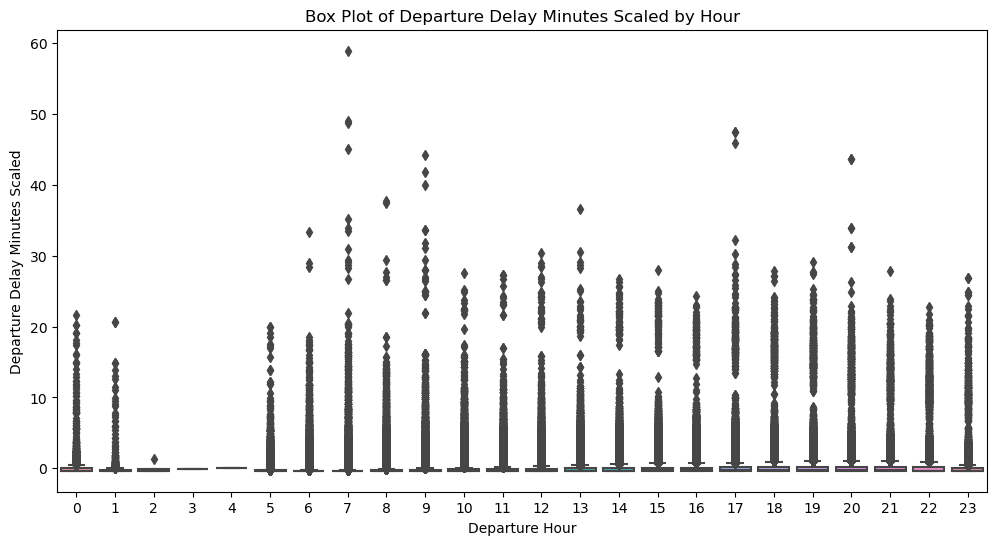

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DepHour', y='DepDelayMinutes_scaled', data=df)
plt.title('Box Plot of Departure Delay Minutes Scaled by Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Departure Delay Minutes Scaled')
plt.show()

In [10]:
df['CRSDepTime'] = df['CRSDepTime'].astype(str).str.zfill(4)
df['DepHour'] = df['CRSDepTime'].str[:2].astype(int)
agg_funcs = {
    'DepDelayMinutes': ['median', 'count']
}
median_delay_by_hour_air = df.groupby(['Marketing_Airline_Network', 'DepHour']).agg(agg_funcs).reset_index()
median_delay_by_hour_air.columns = ['Marketing_Airline_Network', 'DepartureHour', 'MedianDepDelayMinutes', 'CountOfDelays']

pd.set_option('display.max_rows', None)
median_delay_by_hour_air
#median_delay_by_hour_air[(median_delay_by_hour_air['MedianDepDelayMinutes'] > 5) & (median_delay_by_hour_air['CountOfDelays'] > 100)]
#median_delay_by_hour_air[(median_delay_by_hour_air['MedianArrDelayMinutes'] > 5) & (median_delay_by_hour_air['CountOfDelays'] > 100)]

,Marketing_Airline_Network,DepartureHour,MedianDepDelayMinutes,CountOfDelays
0,AA,0,0.0,1685
1,AA,1,0.0,537
2,AA,2,0.0,4
3,AA,5,0.0,4740
4,AA,6,0.0,12273
5,AA,7,0.0,19855
6,AA,8,0.0,36167
7,AA,9,0.0,34585
8,AA,10,0.0,33561
9,AA,11,0.0,29549
